# **Project: Hypothesis Testing for Sales and Marketing Strategies**

## Project Description

The objective of this project focuses on conducting hypothesis testing to analyze the relationship between sales and marketing efforts. Through statistical analysis, this project aims to determine the significance of marketing strategies on sales performance. The dataset consists of information on independent marketing promotions conducted by the business, focusing on various promotion types such as TV, social media, radio, and influencer marketing. The primary goal is to determine if there are significant differences in sales among different TV and influencer promotion types.

By performing the ANOVA and post hoc tests, the project aims to provide the stakeholders with robust statistical evidence regarding the impact of different TV and influencer promotion types on sales. The results of the analysis will enable to make more informed recommendations to drive future marketing strategies and optimize promotional efforts.

## Business challenge

The business faces the challenge of optimizing its marketing promotions to increase sales. To achieve this, it is crucial to understand the effectiveness of various promotional strategies, specifically focusing on TV and influencer promotions. The stakeholders are seeking insights into whether sales significantly differ across different TV and influencer promotion types.

By addressing this challenge, the project aims to provide actionable insights to the business, enabling them to make data-driven decisions regarding their marketing strategies.

## Import packages & load dataset

In [ ]:
# Import necessary libraries

from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
## Load data from local drive

uploaded=files.upload()

Saving Sales_marketing_data.csv to Sales_marketing_data.csv


In [ ]:
# Load the data

df = pd.read_csv(io.StringIO(uploaded['Sales_marketing_data.csv'].decode('utf-8')))


In [ ]:
# Display

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## **Perform EDA** (data visualization, descriptive statistics, missing values)


In [ ]:
# Get data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [ ]:
# Descriptive statistics

df.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.646472,3.248471,193.516937
std,9.650740,2.195696,90.516153
min,0.194576,0.013230,31.199409
25%,10.878554,1.447163,118.544562
50%,18.810430,2.945318,198.521410
75%,25.838296,4.791290,268.567987
max,48.871161,11.260430,358.420739


In [ ]:
# check for missing data

df.isnull().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [ ]:
# Drop rows that contain missing data

df = df.dropna(axis=0)

In [ ]:
# Confirm

df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
567    0
568    0
569    0
570    0
571    0
Length: 569, dtype: int64

In [ ]:
# Check for duplicates

df.duplicated().sum()

0

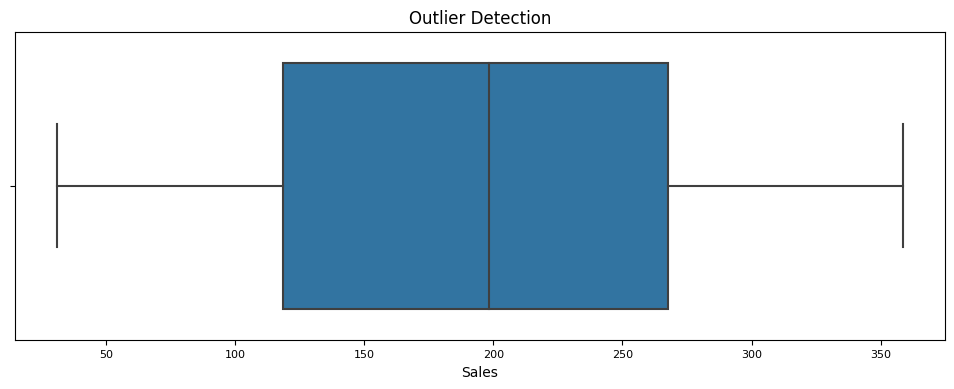

In [ ]:
### Check for outliers

# visualize distribution of 'Sales' to detect any outliers

plt.figure(figsize=(12,4))
plt.title('Outlier Detection')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['Sales'])
plt.show()

#### determine how `Sales` vary based on the `TV` promotion budget category.

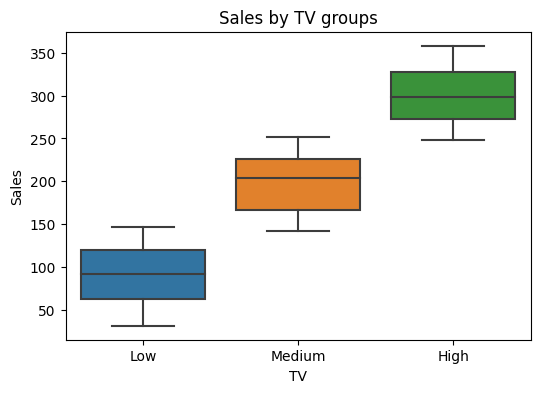

In [ ]:
# Create a boxplot with TV and Sales

plt.figure(figsize=(6,4))
plt.title('Sales by TV groups')
sns.boxplot( data = df, x = "TV", y = "Sales");


From the plot, there is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.

#### determine how `Sales` vary based on the `Influencer` size category.

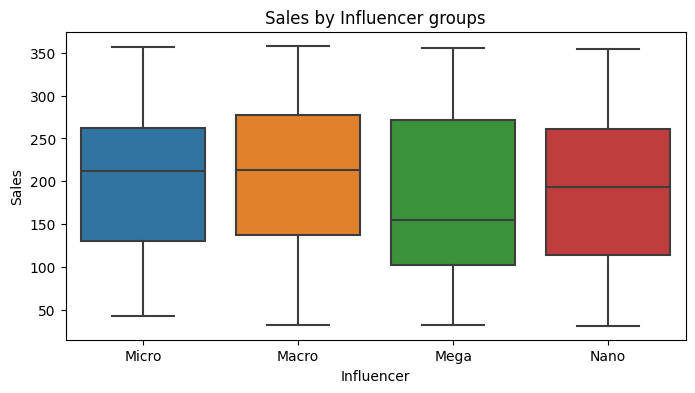

In [ ]:
# Create a boxplot with Influencer and Sales.

plt.figure(figsize=(8,4))
plt.title('Sales by Influencer groups')
sns.boxplot(data = df, x = "Influencer", y = "Sales");


from the plot, there is some variation in `Sales` across the `Influencer` groups, but it may not be significant.

## Model building

Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`.

In [ ]:
# relationship between the variable "Sales" and the categorical variable "TV"

# The "C" in "C(TV)" indicates that "TV" should be treated as a categorical variable

ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = df)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          8.81e-256
Time:                        18:46:55   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `TV` was selected because it shows a strong relationship with `TV` `Sales`
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the analysis.

#### verify that the normality assumption is upheld for the model.

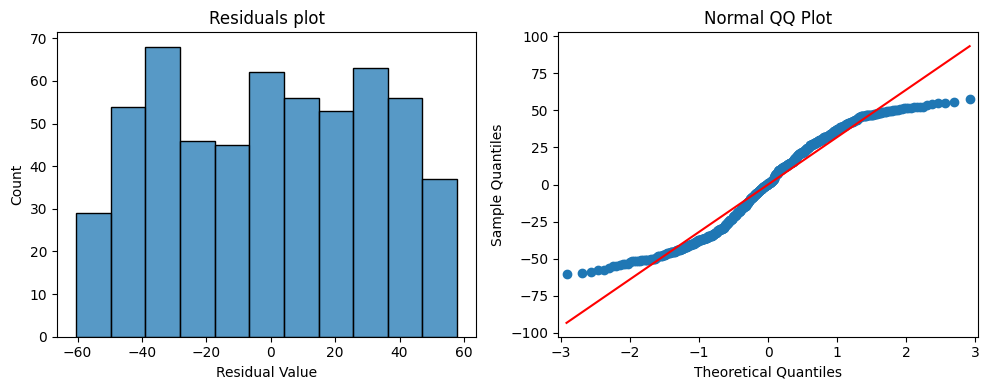

In [ ]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (10,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Residuals plot")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


There is reasonable concern that the normality assumption is not met when `TV` is used as the independent variable predicting `Sales`. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior.

However, for the purpose of the lab, continue assuming the normality assumption is met.

#### verify the constant variance (homoscedasticity) assumption is met for this model.

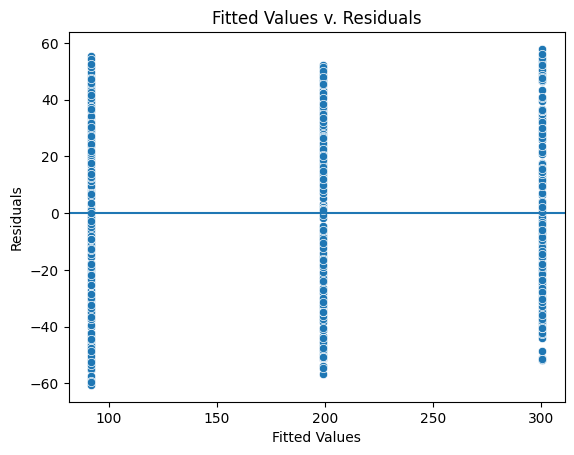

In [ ]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

## Results and evaluation

First, display the OLS regression results.

In [ ]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          8.81e-256
Time:                        18:46:55   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Using `TV` as the independent variable results in a linear regression model with $R^{2} = 0.874$. In other words, the model explains $87.4\%$ of the variation in `Sales`. This makes the model an effective predictor of `Sales`.


The default `TV` category for the model is `High`, because there are coefficients for the other two `TV` categories, `Medium` and `Low`. According to the model, `Sales` with a `Medium` or `Low` `TV` category are lower on average than `Sales` with a `High` `TV` category.


Given how accurate `TV` was as a predictor, the model could be improved with a more granular view of the `TV` promotions, such as additional categories or the actual `TV` promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy.

## Perform a one-way ANOVA test

In [ ]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN



Null hypothesis: there is no difference in `Sales` based on the `TV` promotion budget.

Alternative hypothesis: there is a difference in `Sales` based on the `TV` promotion budget.

The F-test is 1971.46, and the p-value is 8.805550e-256. Since the p-value is very small and less than the significance level of 0.05.

Based on the results of the one-way ANOVA test, we reject the Null hypothesis in favor of the Alternative hypothesis. This suggests that the `TV` promotion budget has a significant impact on `Sales`, and there are variations in `Sales` across different `TV` promotion groups.

### Perform an ANOVA post hoc test

In [ ]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = df["Sales"], groups = df["TV"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


Based on the results of the Tukey HSD (Honestly Significant Difference) test with a family-wise error rate (FWER) of 0.05:

`High` vs. `Low`: The mean difference is  -208.8133. The p-value is 0.0, indicating a significant difference. The 95% confidence interval for the difference ranges from -216.6367 to -200.9898.  

`High` vs. `Medium`: The mean difference is  -101.5061. The p-value is 0.0, indicating a significant difference. The 95% confidence interval for the difference ranges from -109.3202 to -93.6921.

`Low` vs. `Medium`: The mean difference is  107.3072. The p-value is 0.0, indicating a significant difference. The 95% confidence interval for the difference ranges from 99.7066 to 114.9077.

Thus, we reject the null hypothesis and conclude that there is a significant difference in Sales between `High` vs. `Low`, `High` vs. `Medium` & `Low` vs. `Medium` `TV` groups.

These results from the Tukey HSD test provide detailed information about the significant differences between the TV groups in terms of Sales. The post hoc analysis allows us to determine the specific group comparisons that exhibit significant differences, thereby enhancing our understanding of the relationships between the TV promotion types and their impact on Sales.

## Key findings & Considerations


* Box-plots provided a useful visualization of the variable distribution across groups, aiding in understanding the data's spread.
* One-way ANOVA was used to determine if there are significant differences among the means of three or more groups.
* ANOVA post hoc tests offered detailed insights into the pairwise differences between groups.

High TV promotion budgets result in significantly more sales compared to both medium and low TV promotion budgets.

Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.

Additional analysis:

The linear regression model used to estimate `Sales` based on the `TV` promotion budget achieved an R-squared value of 0.874, indicating a reasonably accurate estimator. The model showed a statistically significant relationship between the `TV` promotion budget and `Sales`.

Shifting from a medium to a high `TV` promotion budget resulted in a substantial increase in sales.
Choosing a high `TV` promotion budget over a low `TV` promotion budget led to a significant boost in sales.

These findings highlight the positive impact of allocating a higher budget to `TV` promotion, indicating its effectiveness in driving sales.


The results of the one-way ANOVA test provide evidence to reject the null hypothesis that there is no difference in Sales based on the TV promotion budget. Furthermore, the ANOVA post hoc test revealed significant differences among all pairs of TV promotions.

Both the one-way ANOVA test and Tukey's HSD test confirmed the presence of a significant difference in the distribution of sales across TV promotions.

These findings emphasize the impact of the TV promotion budget on Sales, highlighting the distinct sales performance between different TV promotion categories.